# 导入需要的库

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import json
from urllib import request

#encoding:utf-8 
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 实验一
## 数据统计每一天发邮件的数量，并用可视化软件实现可视化。

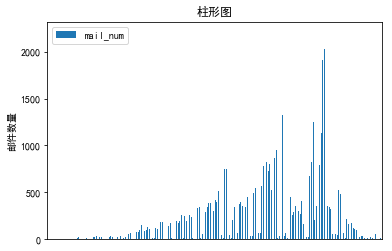

<Figure size 1080x360 with 0 Axes>

In [2]:
#打开数据库连接
db = pymysql.connect("localhost","root","password","enron" )
 
#使用 cursor() 方法创建一个游标对象 cursor
cursor = db.cursor()
 
#使用 execute() 方法执行 SQL 查询 
cursor.execute('''select date_format(date, '%Y-%m-%d') as days, count(*) as mail_num from message 
                  group by days order by days;''')
rows = cursor.fetchall()

df = pd.DataFrame([[ij for ij in i] for i in rows])
df.rename(columns={0: 'days', 1: 'mail_num'}, inplace=True);
df = df.loc[df.days >= '1997']
df = df.loc[df.days <= '2007']


df.plot(kind='bar')
plt.xlabel('每一天')
plt.ylabel('邮件数量')
plt.title('柱形图')
#隐藏x轴数值
plt.gca().axes.get_xaxis().set_visible(False)
plt.figure(figsize=(15, 5))
plt.show()


## 统计每一周发邮件的数量，并用可视化软件实现可视化。

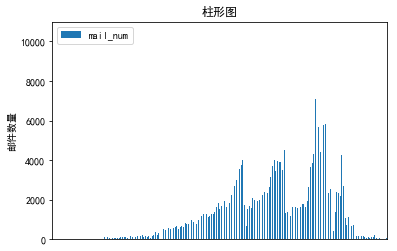

<Figure size 1080x360 with 0 Axes>

In [3]:
#使用 execute() 方法执行 SQL 查询 
cursor.execute('''select date_format(date, '%Y-%u') as weeks, count(*) as mail_num from message
               group by weeks
               order by weeks;''')
rows = cursor.fetchall()

df = pd.DataFrame([[ij for ij in i] for i in rows])
df.rename(columns={0: 'days', 1: 'mail_num'}, inplace=True);
df = df.loc[df.days >= '1997']
df = df.loc[df.days <= '2007']
df.plot(kind='bar')
plt.xlabel('每一周')
plt.ylabel('邮件数量')
plt.title('柱形图')
plt.gca().axes.get_xaxis().set_visible(False)
#plt.gcf().autofmt_xdate()  # 自动旋转日期标记
plt.figure(figsize=(15, 5))
plt.show()


# 实验二
## 将下载下来的the Growlers的所有音乐的歌名提取出来，并可视化显示。

In [3]:
html = request.urlopen(r'https://itunes.apple.com/search?term=the+growlers')
hjson = json.loads(html.read())
items_list = hjson["results"]

db = pymysql.connect("localhost","root","password","itunes")
cursor = db.cursor()

for item in items_list:
    t = (item['trackName'], item['artistName'])
    sql = "insert into songs values (%s, %s)"
    try:
        # 执行sql语句
        cursor.execute(sql, t)
        # 提交到数据库执行
        db.commit()
    except :
        # 如果发生错误则回滚
        db.rollback()


In [181]:
cursor.execute("select * from songs;")
rows = cursor.fetchall()

df = pd.DataFrame([[ij for ij in i] for i in rows])
df.rename(columns={0: 'trackName', 1: 'artistName'}, inplace=True);
df

,trackName,artistName
0,Beach Rats,The Growlers
1,Big Toe,The Growlers
2,Black Jungle Supreme,The Growlers
3,Black Memories,The Growlers
4,Blood of a Mutt,The Growlers
5,Burden of the Captain,The Growlers
6,Chinese Fountain,The Growlers
7,City Club,The Growlers
8,Derka Blues,The Growlers
9,Dogheart II,The Growlers


In [ ]:
# 关闭游标
cursor.close()
# 关闭数据库连接
db.close()